In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

Data_Set = 1
df_merge4 = pd.read_csv("Data.csv")
df_merge4["Business Type Index"]= df_merge4["Business Type Index"].astype('category')

## Data Set 1

In [32]:
if Data_Set == 1:

       # Initialise the Scaler
       scaler = StandardScaler()
       
       X = df_merge4.drop(['Business Name', 'Business Type', 'RatingValue', 'PostCode', 'RatingDate', 'LocalAuthorityName' ,'LocalAuthorityCode', 
                            'Hygiene', 'Structural', 'Confidence In Management', 'PostCode_S', 'PostCode', "pcd_sect","pcd_sect_S","Geocode_Lat", "Geocode_Long", "Postcode"] , axis=1)


       features = ['Business Type Index','RVM_Sector','RVM_Area', 'RVM_Dist', 'White','Mixed','Asian','BAC','Other', "Deprivation"]   

       # To scale data
       scaler.fit(X)

       y = df_merge4["RatingValue"].astype("float")


       
       #X = X.drop('PostCode_S', 'pcd', 'pcd2', 'pcds', 'pcd_sect',
              #'pcd_dist', 'pcd_area', 'oa21')

## Data Set #2

In [3]:
if Data_Set == 2:

       # Initialise the Scaler
       scaler = StandardScaler()
       
       X = df_merge4.drop(['Business Name', 'Business Type', 'RatingValue', 'PostCode', 'RatingDate', 'LocalAuthorityName' ,'LocalAuthorityCode', 
                            'Hygiene', 'Structural', 'Confidence In Management', 'PostCode_S', 'PostCode', "pcd_sect","pcd_sect_S","Geocode_Lat", "Geocode_Long", "Postcode", 'RVM_Sector','RVM_Area', 'RVM_Dist', 'Business Type Index'] , axis=1)


       features = ['White','Mixed','Asian','BAC','Other', "Deprivation"]   

       # To scale data
       scaler.fit(X)

       y = df_merge4["RatingValue"]
       
       #X = X.drop('PostCode_S', 'pcd', 'pcd2', 'pcds', 'pcd_sect',
              #'pcd_dist', 'pcd_area', 'oa21')

## Data Set #3

In [4]:
if Data_Set ==3:

       # Initialise the Scaler
       scaler = StandardScaler()
       
       X = df_merge4.drop(['Business Name', 'Business Type', 'RatingValue', 'PostCode', 'RatingDate', 'LocalAuthorityName' ,'LocalAuthorityCode', 
                            'Hygiene', 'Structural', 'Confidence In Management', 'PostCode_S', 'PostCode', "pcd_sect","pcd_sect_S", "Postcode", 'RVM_Sector','RVM_Area', 'RVM_Dist', 'Business Type Index'] , axis=1)


       features = ["Geocode_Lat", "Geocode_Long", 'White','Mixed','Asian','BAC','Other', "Deprivation"]   

       # To scale data
       scaler.fit(X)

       y = df_merge4["RatingValue"]
       
       #X = X.drop('PostCode_S', 'pcd', 'pcd2', 'pcds', 'pcd_sect',
              #'pcd_dist', 'pcd_area', 'oa21')

In [33]:
X.columns

Index(['Business Type Index', 'RVM_Sector', 'RVM_Area', 'RVM_Dist', 'White',
       'Mixed', 'Asian', 'BAC', 'Other', 'Deprivation'],
      dtype='object')

In [34]:
X.dtypes

Business Type Index    category
RVM_Sector              float64
RVM_Area                float64
RVM_Dist                float64
White                   float64
Mixed                   float64
Asian                   float64
BAC                     float64
Other                   float64
Deprivation             float64
dtype: object

In [35]:
y.dtypes

dtype('float64')

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

## Which model would work the best : classifiers?

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [9:17:23<00:00, 1153.21s/it]  

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.54               0.27    None      0.58   
GaussianNB                         0.65               0.25    None      0.62   
QuadraticDiscriminantAnalysis      0.69               0.22    None      0.63   
PassiveAggressiveClassifier        0.48               0.21    None      0.53   
KNeighborsClassifier               0.68               0.21    None      0.64   
DecisionTreeClassifier             0.63               0.21    None      0.62   
ExtraTreesClassifier               0.65               0.21    None      0.63   
ExtraTreeClassifier                0.63               0.21    None      0.62   
BernoulliNB                        0.64               0.20    None      0.62   
BaggingClassifier                  0.67               0.20    None      0.63   
RandomForestClassifier             0.68 

## Which model would work the best : regression?

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 26%|██▌       | 11/42 [01:56<06:44, 13.04s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.
GaussianProcessRegressor model failed to execute
Unable to allocate 399. GiB for an array with shape (231434, 231434) and data type float64


 38%|███▊      | 16/42 [03:07<04:18,  9.95s/it]

KernelRidge model failed to execute
Unable to allocate 399. GiB for an array with shape (231434, 231434) and data type float64


 62%|██████▏   | 26/42 [04:08<04:03, 15.22s/it]

## Decision Tree

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


clf = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 10, min_samples_split = 5, random_state = 50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Gini Accuracy: ", 
	accuracy_score(y_test,y_pred)*100)




Gini Accuracy:  72.8842780231081


In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=features)
print (text_representation)



|--- RVM_Sector <= 4.52
|   |--- Business Type Index <= 5.00
|   |   |--- RVM_Sector <= 4.24
|   |   |   |--- Business Type Index <= 2.50
|   |   |   |   |--- RVM_Sector <= 4.03
|   |   |   |   |   |--- RVM_Sector <= 3.64
|   |   |   |   |   |   |--- RVM_Sector <= 3.42
|   |   |   |   |   |   |   |--- Deprivation <= 3.50
|   |   |   |   |   |   |   |   |--- White <= 0.39
|   |   |   |   |   |   |   |   |   |--- Business Type Index <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- Business Type Index >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 5.0
|   |   |   |   |   |   |   |   |--- White >  0.39
|   |   |   |   |   |   |   |   |   |--- RVM_Area <= 4.23
|   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |   |   |   |--- RVM_Area >  4.23
|   |   |   |   |   |   |   |   |   |   |--- class: 5.0
|   |   |   |   |   |   |   |--- Deprivation >  3.50
|   |   |   |   |   |   |   |   |--- class: 

In [ ]:
do_this = False
if do_this:

    import matplotlib
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(25,20)) 
    dummy = tree.plot_tree(clf_gini, 
                  filled=True)

In [ ]:
import pickle
pickle.dump(clf, open("clf_Decision_Tree.pickle", 'wb'))

In [ ]:
## Save the model(s)
import pickle
pickle.dump(clf_gini, open('clf_gini.pickle', 'wb'))
pickle.dump(clf_entropy, open('clf_entropy.pickle', 'wb'))

# k-NN Classification

## Measure Performance of K-NN Classification
Train/Test split

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

In [15]:
knn = KNeighborsClassifier(algorithm='kd_tree', n_neighbors =9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [16]:
print(f"Test set predictions: {y_pred}")

Test set predictions: [4. 5. 5. ... 5. 5. 5.]


In [17]:
knn.score(X_test, y_test)

0.7082795612195515

In [18]:
## Save the model
import pickle
pickle.dump(knn, open('clf_KNN.pickle', 'wb'))

## LightGBM

In [37]:
cat_col = df_merge4.select_dtypes("category").columns.tolist()

In [39]:
df_merge4.dtypes


Business Name                 object
Business Type                 object
PostCode                      object
RatingValue                    int64
RatingDate                    object
LocalAuthorityName            object
LocalAuthorityCode             int64
Geocode_Lat                  float64
Geocode_Long                 float64
Hygiene                       object
Structural                    object
Confidence In Management      object
Business Type Index         category
PostCode_S                    object
pcd_sect                      object
pcd_sect_S                    object
RVM_Sector                   float64
RVM_Area                     float64
RVM_Dist                     float64
White                        float64
Mixed                        float64
Asian                        float64
BAC                          float64
Other                        float64
Postcode                      object
Deprivation                  float64
dtype: object

In [40]:
cat_col

['Business Type Index']

In [41]:
# optimised version

import lightgbm as lgb

params = {} #initialize parameters
params['learning_rate'] = 0.06317429080172166
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mae'
params['sub_feature'] = 0.5317749987706815
params['num_leaves'] = 291
params['min_data'] = 79
params['max_depth'] = -52

clf = lgb.LGBMRegressor(num_leaves= 291, max_depth=-52, 
                         random_state=314,
                         silent=True, 
                         metric='mae', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.06317429080172166,
                         boosting_type='gbdt',
                         objective = 'regression',
                         sub_feature = 0.5317749987706815,
                         min_data = 79,
                         categorical_feature = cat_col
                         )

    


#clf.fit(X_train, y_train, **fit_params)
clf.fit(X_train, y_train)

c:\Users\nigel\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\nigel\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
c:\Users\nigel\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set with colsample_bytree=0.9, will be overridden by sub_feature=0.5317749987706815. Current value: feature_fraction=0.5317749987706815
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=79. Current value: min_data_in_leaf=79


LGBMRegressor(categorical_feature=['Business Type Index'], colsample_bytree=0.9,
              learning_rate=0.06317429080172166, max_depth=-52, metric='mae',
              min_data=79, n_estimators=1000, n_jobs=4, num_leaves=291,
              objective='regression', random_state=314, silent=True,
              sub_feature=0.5317749987706815, subsample=0.9)

<AxesSubplot: >

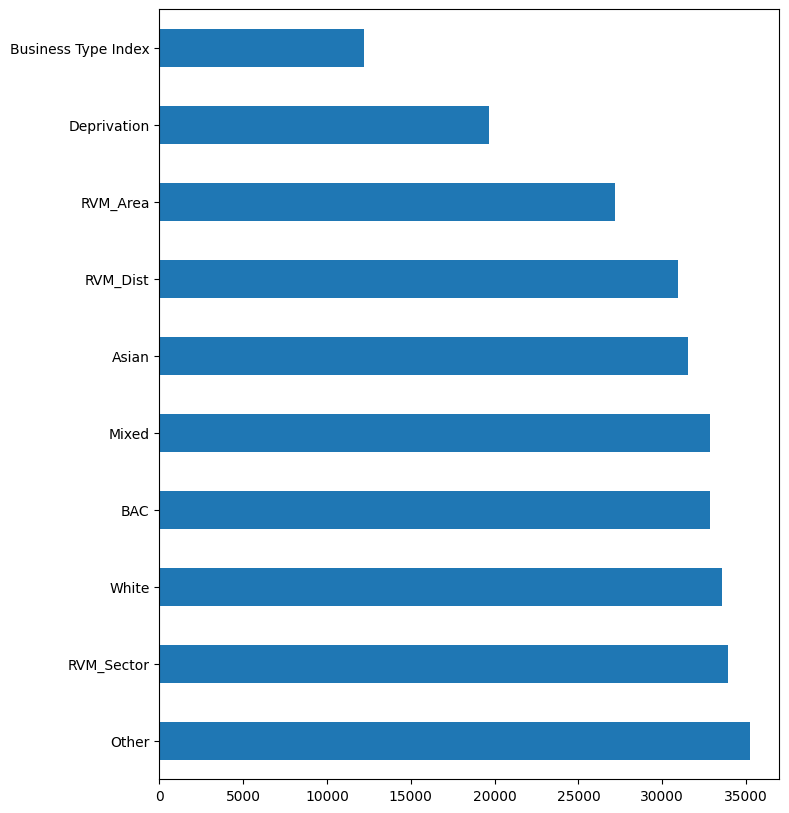

In [42]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [47]:
# view accuracy
#from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
#accuracy=accuracy_score(y_pred, y_test)
mae=mean_absolute_error(y_pred,y_test)

#print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('LightGBM Model mean absolute error {0:0.4f}'.format(mae))

LightGBM Model mean absolute error 0.5414


## Save the model

In [48]:
import pickle
pickle.dump(clf, open('clf_LGBM.pickle', 'wb'))

## Code to get LightGBM parameters

In [ ]:
## Get the best parameters for LightGBM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import pprint
RANDOM_STATE = 42

# Feature scaling
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

#Set the minimum error arbitrarily large
min = 99999999999999999999999 
count = 0 #Used for keeping track of the iteration number
#How many runs to perform using randomly selected hyperparameters
iterations = 50
for i in range(iterations):
    print('iteration number', count)
    count += 1 #increment count
    try:
        d_train = lgb.Dataset(x_train, label=y_train) #Load in data
        params = {} #initialize parameters
        params['learning_rate'] = np.random.uniform(0, 1)
        params['boosting_type'] = np.random.choice(['gbdt', 'dart', 'goss'])
        params['objective'] = 'regression'
        params['metric'] = 'mae'
        params['sub_feature'] = np.random.uniform(0, 1)
        params['num_leaves'] = np.random.randint(20, 300)
        params['min_data'] = np.random.randint(10, 100)
        params['max_depth'] = np.random.randint(5, 200)
       #iterations = np.random.randint(10, 10000)
        iterations = np.random.randint(10, 1000)
        print(params, iterations)
        #Train using selected parameters
        clf = lgb.train(params, d_train, iterations)
        y_pred=clf.predict(x_test) #Create predictions on test set
        mae=mean_absolute_error(y_pred,y_test)
        print('MAE:', mae)
        if mae < min:
            min = mae
            pp = params 
    except: #in case something goes wrong
        print('failed with')
        print(params)
        break
print("*" * 50)
print('Minimum is: ', min)
print('Used params', pp)

iteration number 0
{'learning_rate': 0.4214340750682204, 'boosting_type': 'goss', 'objective': 'regression', 'metric': 'mae', 'sub_feature': 0.6229732889462753, 'num_leaves': 158, 'min_data': 36, 'max_depth': 177} 501
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1970
[LightGBM] [Info] Number of data points in the train set: 231434, number of used features: 10
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 4.572167
MAE: 0.5785504753057586
iteration number 1
{'learning_rate': 0.4324655745546352, 'boosting_type': 'gbdt', 'objective': 'regression', 'metric': 'mae', 'sub_feature': 0.7494689560940795, 'num_leaves': 155, 'min_data': 62, 'max_depth': 52} 185
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[

## Code to get KNN parameters

In [ ]:
do_this = False
if do_this:

    # This code may not run on GFG
    # As required modules are not found.
    
    # To plot test accuracy and train accuracy Vs K value.
    p = list(range(1, 31))
    lst_test =[]
    lst_train =[]
    for i in p:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        z = knn.score(X_test, y_test)
        t = knn.score(X_train, y_train)
        lst_test.append(z)
        lst_train.append(t)
        
    plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
    plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
    plt.xlabel('K VALUES --->')
    plt.title('FINDING BEST VALUE FOR K')
    plt.legend()
    plt.show()

## Code to get KNN parameters - Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X.shape

(330620, 10)

In [ ]:
do_this = True
if do_this:
    import numpy as np

    param_grid = {'n_neighbors': np.arange(1, 10), "algorithm": ["ball_tree", "kd_tree"]}

    knn = KNeighborsClassifier()
    knn_cv = GridSearchCV(knn, param_grid)
    knn_cv.fit(X, y)
    print (knn_cv.best_params_)

    knn_cv.best_score_

In [ ]:
print (knn_cv.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 9}


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
y_pred

array([5., 5., 5., ..., 5., 5., 5.])

## Code to get Decision Tree Parameters

In [ ]:
 
decision_tree = DecisionTreeClassifier()


param_dict = {'criterion': ['gini', 'entropy'],  "max_depth": range(1,10), "min_samples_split": range(1,10), "min_samples_leaf":range(1,5)}

grid = GridSearchCV(decision_tree, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print (grid.best_params_)
print (grid.best_estimator_)
print (grid.best_score_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1}
DecisionTreeClassifier(max_depth=1, min_samples_split=1)
0.7327056525757087
